Title: When to Use Histogram Plots
Slug: when-use-histogram
Summary: Examples of datasets to illustrate when to use histograms to visualize the distribution of a continous variable
Date: 2018-06-13 23:00  
Category: Data Visualizations
Subcategory: Best Practices
PostType: Tutorial
Tags: histogram
Keywords: when use histogram plots
Authors: Dan Friedman

**Histograms** visualize the shape of the distribution for a variable that contains numerical values. A histogram displays data using bars of different heights.

Histograms are slightly similar to vertical bar charts; however, with histograms, numerical values are grouped into **bins**. For example, you could create a histogram of the mass (in pounds) of everyone at your university. In doing so, you'd need to create bins so that the mass of people from 40 pounds to 60 pounds is one bin, and 60 pounds to 80 pounds is another bin, and so forth. 

Similar to box plots, histograms visualize the distribution of a dataset. However, box plots are often more ideal for identifying outliers, if any exist.

Below, I'll walk through a few examples below of when histograms are useful.

#### Import Modules

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
% matplotlib inline

### Example: Bay Area Bike Share Ride Duration Data

In the San Francisco Bay Area, a company Motivate operates a network of bikes across several cities. You can walk up to a bike, pay and unlock it from a dock, ride it to your destination, and park it in another nearby dock.

There's an option to become a member (aka subscriber) in which you pay a monthly subscription fee that includes unlimited rides that are up to 30 minutes long. When someone becomes a member, they can submit information on their birth year and gender.

For each ride, Motivate records data on the start time, end time, member birth year and member gender.

I'm curious to learn more about the duration of bike rides by customers.

#### Load Dataset on May 2018 Rides

In [130]:
df = pd.read_csv('201805-fordgobike-tripdata.csv')

#### Preview Some Data

In [131]:
df[['start_time', 'end_time', 'duration_sec', 'member_birth_year', 'member_gender']].head()

,start_time,end_time,duration_sec,member_birth_year,member_gender
0,2018-05-31 21:41:51.4750,2018-06-01 13:28:22.7220,56791,NaN,NaN
1,2018-05-31 18:39:53.7690,2018-06-01 09:19:51.5410,52797,1983.0,Male
2,2018-05-31 21:09:48.0150,2018-06-01 09:09:52.4850,43204,NaN,NaN
3,2018-05-31 14:09:54.9720,2018-06-01 08:48:17.8150,67102,1979.0,Male
4,2018-05-31 16:07:23.8570,2018-06-01 08:28:47.2020,58883,1986.0,Male


#### Make New Column for Ride Time in Minutes

They record duration of rides in seconds because it's a granular metric of duration. However, when we discuss bike rides with friends, we typically say 20 minutes, not 1200 seconds.

Below, I create a new column to convert the duration of rides in seconds into minutes.

In [132]:
df['duration_minutes'] = df['duration_sec']/60

#### View Descriptive Statistics of Ride Time in Minutes

Below, we can see the shortest ride was 1 minute and the maximum was 1436 minutes - that's almost a 24 hour ride! 

The 99th percentile value is 91.5 minutes, which is over three times as large as the 95th percentile value of 30.63 minutes.

In [133]:
df['duration_minutes'].describe(percentiles=[.25, .5, .75, .9, .95, .99, .999])

count    179125.000000
mean         14.248406
std          39.942553
min           1.016667
25%           5.700000
50%           9.133333
75%          14.500000
90%          22.600000
95%          30.633333
99%          91.500000
99.9%       687.312667
max        1436.800000
Name: duration_minutes, dtype: float64

#### Plot Histogram of Ride Time in Minutes

Below, I limit my histogram to show rides up to 91 minutes because that's still the 99th percentile. I don't want my visualization to be distorted by outliers. A focus on up to the 99th percentile will help us draw insights on the patterns of the majority of riders.

The Seaborn visualization library in Python automatically determines bin size using the Freedman-Diaconis rule. This is a very convenient feature to have!

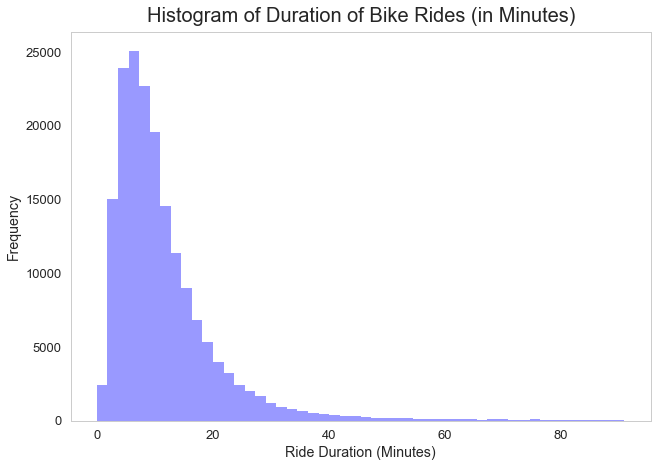

In [134]:
sns.set_context("talk")
ax = sns.distplot(df['duration_minutes'], kde=False, color='b', hist_kws={"range": [0, 91]})
ax.axes.set_title("Histogram of Duration of Bike Rides (in Minutes)", fontsize=20, y=1.01)
ax.set(xlabel='Ride Duration (Minutes)', ylabel='Frequency');

#### Interpretation of Bike Ride Duration Histogram

The highest occurence of bike rides are around 7 minutes.

Most bike rides are just from 3 - 15 minutes which I consider fairly short rides. Therefore, I could theorize that bay area bike share members infrequently use these bikes for long strenous exercises riding long distances. Rather, they likely use bike rides for short distances.

The histogram illustrates positive skew. This means there's a long tail on the right side of our peak. Because of this skew, the mean ride duration is larger than the median ride duration. Below, I printed out the mean and median so we can verify that while the mean ride duration is 14.24 minutes, the median is smaller at 9.13 minutes. 

In [135]:
df['duration_minutes'].mean()

14.248405768783414

In [136]:
df['duration_minutes'].median()

9.133333333333333

### Example: Age of Bike Riders

I'm curious to learn about the age distribution of members of the bay area bike share program. 

#### Create New Column for Age (in Years)

They record the birth year of members. However, it's easier to interpret the age in years rather than year of birth.

In [137]:
df['age_years'] = 2018 - df['member_birth_year']

#### View Descriptive Statistics on Riders' Age

Below, we can see 18 is the youngest rider and the oldest is 129. However, the 99th percentile is 66 years old, nearly half the age of the maximum rider.

In [138]:
df['age_years'].describe(percentiles=[.25, .5, 0.75, 0.99, 0.9999])

count     167376.000000
mean          35.813575
std           10.320561
min           18.000000
25%           28.000000
50%           33.000000
75%           41.000000
99%           66.000000
99.99%       118.000000
max          129.000000
Name: age_years, dtype: float64

#### Plot Histogram of Age of Bike Riders

I limit the range of the x-axis (age) to be just 18 to 80 so we can more easily visualize the bulk of riders, and disregard the outliers well over 80.

In [139]:
df_age_members = df[df['age_years'].notnull()]['age_years']

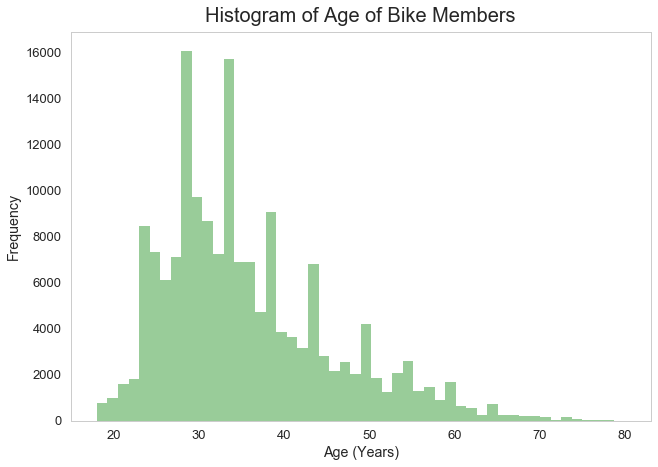

In [140]:
ax2 = sns.distplot(df_age_members, color='g', kde=False, hist_kws={"range": [18, 80]})
ax2.axes.set_title("Histogram of Age of Bike Members", fontsize=20, y=1.01)
ax2.set(xlabel='Age (Years)', ylabel='Frequency');

#### Interpretation of Histogram of Age of Bike Riders

The most frequent age group of riders is people aged 24 - 35 with a peak around 29.

Past roughly 35 years of age, as people get older, they're less likely to be a member of the bay area bike share program. However, there's still several thousand members who are 55 years or older.

There's a wide range of age of bike riders - from 18 to 60+.

This histogram is positively skewed too. There's a long tail of bins with ever-decreasing frequency that extend to the right of our peak. 

### Example: Distribution of Count of Rides by Day of Week For Two User Types

As I mentioned earlier, there's two user types; one is called *Customer* and simply means you pay for individual rides. Another type is called a *Subscriber* (aka a member) in which you pay a monthly subscription fee that includes unlimited rides for rides less than 30 minutes. 

I'm curious of the differences in riding patterns of *Customers* and *Subscribers*. At what times of the day do they ride most often?

I'll create a histogram for each user type to see their distribution of count of rides by hour of day.

#### Create new field to convert start_time into `datetime` type 

In [142]:
df['start_time_datetime'] = pd.to_datetime(df['start_time'])

#### Plot Distribution of Count of Rides by Hour of Day for *Customer* Type

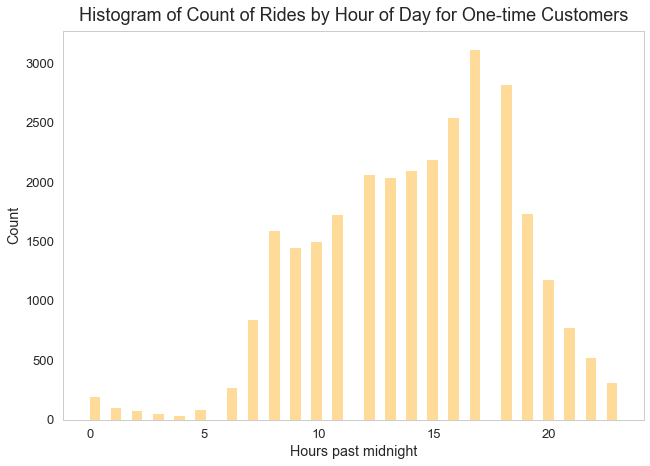

In [147]:
sns.set_style("whitegrid", {'axes.grid' : False})
ax3 = sns.distplot(df[df['user_type']=='Customer']['start_time_datetime'].dt.hour, color='orange', kde=False)
ax3.axes.set_title("Histogram of Count of Rides by Hour of Day for One-time Customers", fontsize=18, y=1.01)
ax3.set(xlabel='Hours past midnight', ylabel='Count');

#### Plot Distribution of Count of Rides by Hour of Day for *Subscriber* Type

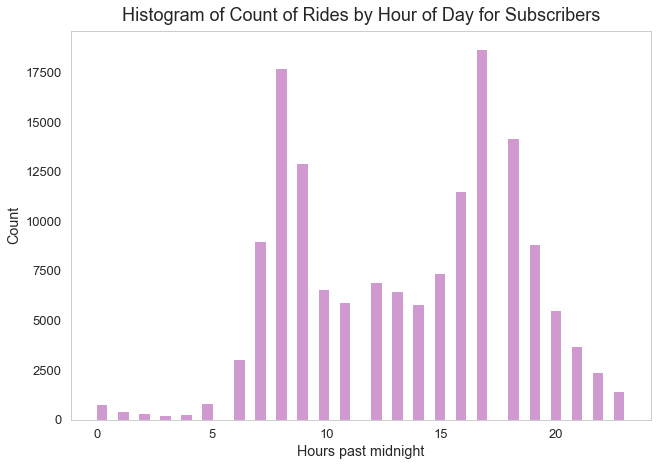

In [146]:
ax4 = sns.distplot(df[df['user_type']=='Subscriber']['start_time_datetime'].dt.hour, color='darkmagenta', kde=False)
ax4.axes.set_title("Histogram of Count of Rides by Hour of Day for Subscribers", fontsize=18, y=1.01)
ax4.set(xlabel='Hours past midnight', ylabel='Count');

#### Interpretation of Histograms on Rides by Hour of Day

These two histograms are very different! The most noticeable thing is that Subscribers tend to ride mostly around 8am (8 hours past midnight) and 5pm (17 hours past midnight). I hypothesize they're mainly using the bikes for commuting since those are standard commuting hours of the day! The Subscriber distribution is rouhgly bimodal too since we see two large peaks.

The one-time Customers histogram reveals a different riding pattern. There is a single peak in which most customers ride around 5pm. Notwithstanding this peak, there's a somewhat uniform distribution of rides from 7am to 7pm. 